# Titanic - Machine Learning from Disaster
### Using machine learning to create a model that predicts which passengers survived the Titanic shipwreck

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading and analyzing data

In [2]:
df = pd.read_csv('data/titanic/train.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Important notes
- The cabin is a very useful attribute, however there are many ​​missing values. Therefore, we will remove it along with other attributes that do not add useful information, such as: Name, Ticket, Fare and Embarked.
- There are some missing values for Age attribute, but as this is a relevant information, we will replace the missing values by the average.

## Preparing data

In [3]:
df.drop(['Cabin','Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

df.replace('male', 0, inplace=True)
df.replace('female', 1, inplace=True)

age_average = df['Age'].median()

df['Age'].fillna(age_average, inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


## Exploring data

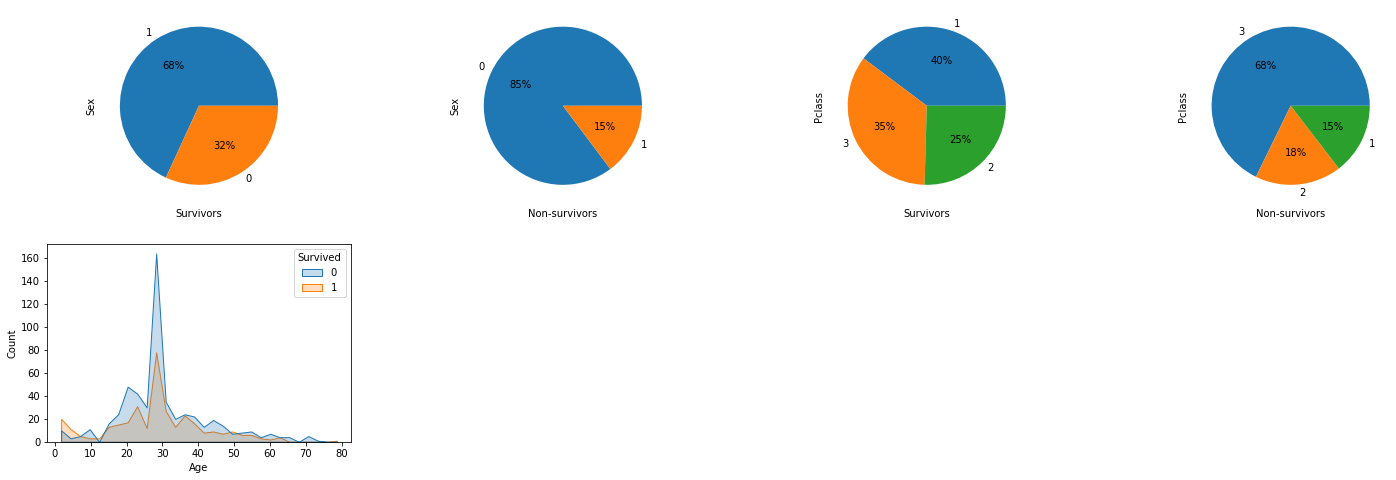

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                Pclass            ... Parch        Fare                        \
            max  count      mean  ...   75%  max  count       mean        std   
Survived                          ...                                           
0         891.0  549.0  2.531876  ...   0.0  6.0  549.0  22.117887  31.388207   
1         890.0  342.0  1.950292  ...   1.0  5.0  342.0  48.395408  66.596998   

                                              
          min      25%   50%   75%       max  
Survived                                      
0         0.0   7.8542  10.5  26.0  263.0000  
1         0.0  12.4750  26.0  57.0  512.3292  

[2 rows x 56 columns]

In [4]:
plt.figure(figsize=(25, 8))

plt.subplot(245)
sns.histplot(x='Age', data=df, hue='Survived', element='poly')
plt.subplot(244)
df.groupby('Survived')['Pclass'].value_counts()[0].plot.pie(autopct='%1.0f%%',)
plt.xlabel('Non-survivors')
plt.subplot(243)
df.groupby('Survived')['Pclass'].value_counts()[1].plot.pie(autopct='%1.0f%%',)
plt.xlabel('Survivors')
plt.subplot(242)
df.groupby('Survived')['Sex'].value_counts()[0].plot.pie(autopct='%1.0f%%', )
plt.xlabel('Non-survivors')
plt.subplot(241)
df.groupby('Survived')['Sex'].value_counts()[1].plot.pie(autopct='%1.0f%%', )
plt.xlabel('Survivors')

plt.show()

df.groupby('Survived').describe()

## Pre-processing data
- Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

X_df = df.drop(['PassengerId', 'Survived',], axis=1)
X = X_df.to_numpy()
y = df['Survived'].to_numpy()

ss = StandardScaler()

ss.fit(X)

X_norm = ss.transform(X)

- PCA

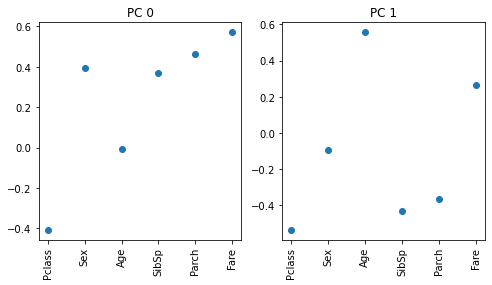

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

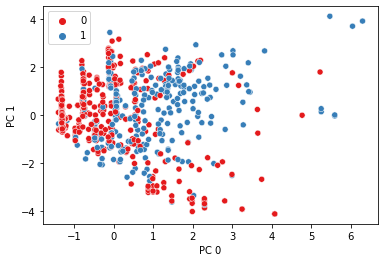

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_norm)

X_pca = pca.transform(X_norm)

X_pca_df = pd.DataFrame(X_pca, columns=['PC 0', 'PC 1'])

fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2)
for idx, pc in enumerate(pca.components_):
    ax[idx].scatter(np.arange(len(X_df.columns)), pc)
    ax[idx].set_xticks(np.arange(len(X_df.columns)))
    ax[idx].set_xticklabels(X_df.columns, rotation=90)
    ax[idx].set_title('PC %d' % (idx))
plt.show()

sns.scatterplot(data=X_pca_df, x='PC 0', y='PC 1', hue=y, palette='Set1')

In [7]:
results = {
    "knn": {
        "kfold": {
            "scores": [],
            "predicts": []
        },
        "hyperparameter": {
            "scores": [],
            "predicts": []
        }
    },
    "svm": {
        "kfold": {
            "scores": [],
            "predicts": []
        },
        "hyperparameter": {
            "scores": [],
            "predicts": []
        }
    }
}

def show_scores_stats(scores_list):
    print("Accuracies scores statistics: min: %.2f, max: %.2f, avg +- std: %.2f+-%.2f" % (min(scores_list), max(scores_list), np.mean(scores_list), np.std(scores_list)))

## Knn

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(f"N-neighbors = 1 with 20% for testing - Acuracy: {accuracy_score(y_test,pred)}%")


N-neighbors = 1 with 20% for testing - Acuracy: 0.7262569832402235%


- K-fold cross-validation

In [9]:
from utils import do_cv_knn

ks = range(1,30,2)
k_vias = 10
knn_kfold_cv_scores, knn_kfold_cv_predicts = do_cv_knn(X_pca, y, k_vias, ks)
results['knn']['kfold']['scores'], results['knn']['kfold']['predicts'] = knn_kfold_cv_scores, knn_kfold_cv_predicts

show_scores_stats(knn_kfold_cv_scores)
print("Best K in validation: %d (acc=%.2f)" % (ks[np.argmax(knn_kfold_cv_scores)], max(knn_kfold_cv_scores)))
knn_kfold_cv_scores

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracies scores statistics: min: 0.66, max: 0.84, avg +- std: 0.74+-0.05
Best K in validation: 7 (acc=0.84)


[0.6555555555555556,
 0.7191011235955056,
 0.7191011235955056,
 0.8426966292134831,
 0.7415730337078652,
 0.7640449438202247,
 0.7415730337078652,
 0.797752808988764,
 0.7078651685393258,
 0.6629213483146067]

- Hyperparameter optimization by cross validation

In [10]:
from utils import do_hp_cv_knn

k1, k2 = 10, 10
knn_hp_cv_scores, knn_hp_cv_predicts = do_hp_cv_knn(X_pca, y, 10, ks)
results['knn']['hyperparameter']['scores'], results['knn']['hyperparameter']['predicts'] = knn_hp_cv_scores, knn_hp_cv_predicts

show_scores_stats(knn_hp_cv_scores)
print("Best K in validation: %d (acc=%.2f)" % (ks[np.argmax(knn_hp_cv_scores)], max(knn_hp_cv_scores)))
knn_hp_cv_scores

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracies scores statistics: min: 0.68, max: 0.88, avg +- std: 0.74+-0.06
Best K in validation: 7 (acc=0.88)


[0.6777777777777778,
 0.7415730337078652,
 0.6966292134831461,
 0.8764044943820225,
 0.6853932584269663,
 0.7752808988764045,
 0.7078651685393258,
 0.797752808988764,
 0.7640449438202247,
 0.7078651685393258]

## SVM

- K-fold cross-validation

In [11]:
from utils import do_cv_svm

k_vias = 10
svm_kfold_cv_scores, svm_kfold_cv_predicts = do_cv_svm(X_pca, y, k_vias, Cs=[1, 10, 100, 1000], gammas=['scale', 'auto', 2e-2, 2e-3, 2e-4])
results['svm']['kfold']['scores'], results['svm']['kfold']['predicts'] = svm_kfold_cv_scores, svm_kfold_cv_predicts

show_scores_stats(svm_kfold_cv_scores)
svm_kfold_cv_scores

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracies scores statistics: min: 0.64, max: 0.80, avg +- std: 0.73+-0.05


[0.6555555555555556,
 0.7528089887640449,
 0.6853932584269663,
 0.797752808988764,
 0.7191011235955056,
 0.7752808988764045,
 0.7303370786516854,
 0.7640449438202247,
 0.797752808988764,
 0.6404494382022472]

- Hyperparameter optimization by cross validation

In [12]:
from utils import do_hp_cv_svm

k1, k2 = 10, 10
svm_hp_cv_scores, svm_hp_cv_predicts = do_hp_cv_svm(X_pca, y, 10, Cs=[1, 10, 100, 1000], gammas=['scale', 'auto', 2e-2, 2e-3, 2e-4])
results['svm']['hyperparameter']['scores'], results['svm']['hyperparameter']['predicts'] = svm_hp_cv_scores, svm_hp_cv_predicts

show_scores_stats(svm_hp_cv_scores)
svm_hp_cv_scores

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracies scores statistics: min: 0.64, max: 0.79, avg +- std: 0.74+-0.05


[0.6444444444444445,
 0.7528089887640449,
 0.6741573033707865,
 0.7865168539325843,
 0.7528089887640449,
 0.7865168539325843,
 0.7078651685393258,
 0.7640449438202247,
 0.7415730337078652,
 0.7865168539325843]

## Analyzing the results

In [13]:
from sklearn.metrics import classification_report

best_classifier = ''
best_cv = ''
best_accuracy_score = 0
best_predict = []

for classifier_key, classifier_value in results.items():
    for cv_key, cv_value in classifier_value.items():
        max_score = max(cv_value['scores'])
        if  max_score >= best_accuracy_score:
            best_accuracy_score = max_score
            best_predict = cv_value['predicts'][cv_value['scores'].index(max_score)]
            best_cv = cv_key
            best_classifier = classifier_key

print(f"{best_classifier} was the best classifier, using {best_cv} cross-validation. Accuracy score: {best_accuracy_score*100}%.")
print(classification_report(best_predict[0],best_predict[1]))

knn was the best classifier, using hyperparameter cross-validation. Accuracy score: 87.64044943820225%.
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.81      0.88      0.85        34

    accuracy                           0.88        89
   macro avg       0.87      0.88      0.87        89
weighted avg       0.88      0.88      0.88        89

